In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex2data1.txt', header=None)
data.columns = ['Wynik 1 egzaminu', 'Wynik 2 egzaminu', 'Czy przyjęty']
data.head()

,Wynik 1 egzaminu,Wynik 2 egzaminu,Czy przyjęty
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


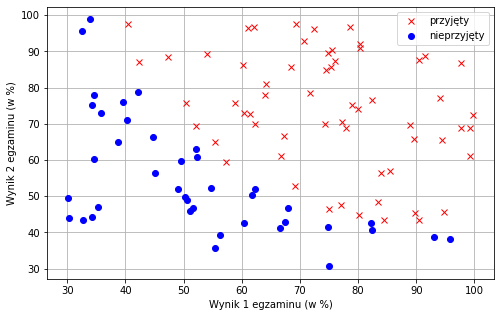

In [3]:
x1 = data['Wynik 1 egzaminu'].values
x2 = data['Wynik 2 egzaminu'].values
y = data['Czy przyjęty'].values
n = y.shape[0]
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)
y = y.reshape(n, 1)

adm = data[data['Czy przyjęty'] == 1]
x1_adm = adm['Wynik 1 egzaminu'].values
x2_adm = adm['Wynik 2 egzaminu'].values
not_adm = data[data['Czy przyjęty'] == 0]
x1_nadm = not_adm['Wynik 1 egzaminu'].values
x2_nadm = not_adm['Wynik 2 egzaminu'].values

plt.figure(figsize=(8, 5))
plt.plot(x1_adm, x2_adm, 'rx', label='przyjęty')
plt.plot(x1_nadm, x2_nadm, 'bo', label='nieprzyjęty')
plt.grid()
plt.xlabel('Wynik 1 egzaminu (w %)')
plt.ylabel('Wynik 2 egzaminu (w %)')
plt.legend()

In [4]:
# funkcja sigmoid
sigmoid = lambda z: 1 / (1 + np.exp(-z))

# Funkcja kosztu
def J (x, y, theta):
    m = y.shape[0]
    h = sigmoid(x @ theta)
    return 1/m * np.sum(-y*np.log(h) - (1 - y)*np.log(1 - h))

# Metoda gradientu sprzężonego
def grad_des(x, y, init_theta, alpha, it): 
    m = y.shape[0]
    n = init_theta.shape[0]
    Js = [J(x, y, init_theta)]
    theta = init_theta.copy()   # Nie chcemy, aby theta początkowe ulegało zmianie
    for i in range(it):
        h = sigmoid(x @ theta)
        for j in range(n):
            theta[j] -= alpha/m * np.sum((h - y) * x[:, [j]])
        Js.append(J(x, y, theta))
    return theta, Js

In [5]:
X = np.concatenate((np.ones(shape=(n, 1)), x1, x2), axis=1) # łączymy z jedynkami
init_theta = np.zeros(shape=(3, 1))
iterations = int(5e6)

theta, Js = grad_des(X, y, init_theta, alpha=1e-3, it=iterations)
Js[-1], theta

(0.20416128092026029,
 array([[-23.12353639],
        [  0.18993761],
        [  0.18497899]]))

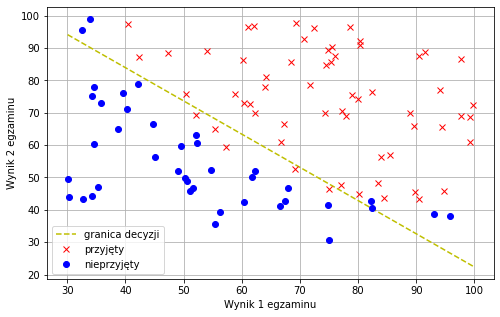

In [6]:
domain = [min(x1), max(x1)]
log_reg1 = lambda x1: (-1 / theta[2]) * (theta[1] * x1 + theta[0])


plt.figure(figsize=(8, 5))
plt.plot(domain, log_reg1(domain), 'y--', label='granica decyzji')
plt.plot(x1_adm, x2_adm, 'rx', label='przyjęty')
plt.plot(x1_nadm, x2_nadm, 'bo', label='nieprzyjęty')
plt.grid()
plt.xlabel('Wynik 1 egzaminu')
plt.ylabel('Wynik 2 egzaminu')
plt.legend()


In [37]:
exam1, exam2 = 80, 40   # Wyniki z egzaminów

results = np.array([[1], [exam1], [exam2]])
prediction = sigmoid(theta.T @ results)
print("Prawdopodbieństwo dostania się na uczelnię:\n{} %".format(int(100 * prediction)))

Prawdopodbieństwo dostania się do uczelni:
37 %


In [ ]:
# Regularyzacja - MATLAB